## audio segment

time:  0.023197278911564628
幀移:  0.0029024943310657597


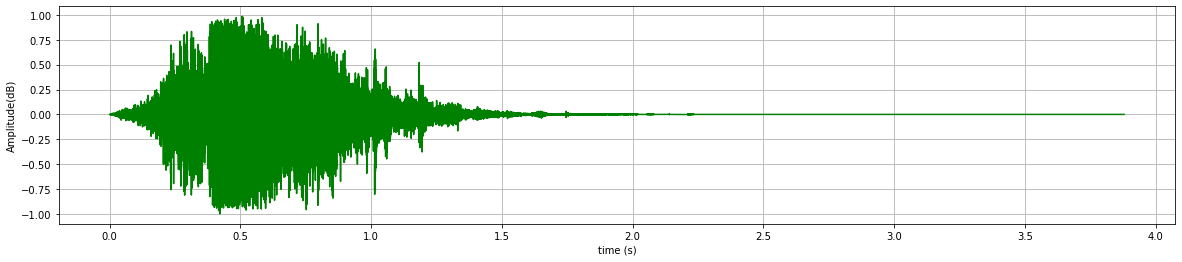

In [9]:
import os;
import numpy as np
import wave
import matplotlib.pyplot as plt


wlen=1024
inc=128

filepath1 = './car_crash_dataset/soundsnap/0s/86177-Crash_auto_car_crash_impact_glass_metal_smash_tire_squeal_brakes-BLASTWAVEFX-21503.wav'
#for file in os.listdir(filepath1):
#    path1 = filepath1 + '\\' + file
path1 = filepath1
#filename = file.split('.')[0]
filename = filepath1.split('.')[0]
f = wave.open(f'{path1}', "rb")
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
str_data = f.readframes(nframes)
wave_data = np.frombuffer(str_data, dtype=np.short)
wave_data = wave_data*1.0/(max(abs(wave_data)))
time = np.arange(0, wlen) * (1.0 / framerate)
print('time: ', time[len(time) - 1])
print('幀移: ', inc/framerate)
signal_length=len(wave_data) #信號總長度
if signal_length<=wlen: #若信號長度小於一個幀的長度，則幀數定義爲1
    nf=1
else: #否則，計算幀的總長度
    nf=int(np.ceil((1.0*signal_length-wlen+inc)/inc))
pad_length=int((nf-1)*inc+wlen) #所有幀加起來總的鋪平後的長度
zeros=np.zeros((pad_length-signal_length,)) #不夠的長度使用0填補，類似於FFT中的擴充數組操作
pad_signal=np.concatenate((wave_data,zeros)) #填補後的信號記爲pad_signal
indices=np.tile(np.arange(0,wlen),(nf,1))+np.tile(np.arange(0,nf*inc,inc),(wlen,1)).T  #相當於對所有幀的時間點進行抽取，得到nf*nw長度的矩陣
#print(indices[:2])
indices=np.array(indices,dtype=np.int32) #將indices轉化爲矩陣
frames=pad_signal[indices] #得到幀信號
totaltime = np.linspace(0, 1.0/framerate*nframes, signal_length)
plt.figure(figsize=(20,4))
plt.plot(totaltime, wave_data,c="g")
plt.xlabel('time (s)')
plt.ylabel('Amplitude(dB)')
plt.grid()
plt.savefig('preAnalysis_pic_output\\original_signal.png', facecolor = 'w')
plt.show()
    

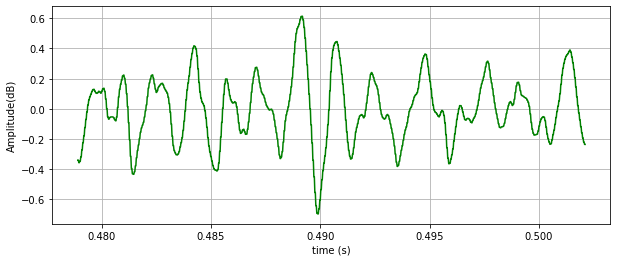

In [10]:
plt_time = time + inc /framerate*165
plt.figure(figsize=(10,4))
plt.plot(plt_time,frames[165],c="g")
plt.xlabel('time (s)')
plt.ylabel('Amplitude(dB)')
plt.grid()
plt.savefig('preAnalysis_pic_output\\window_segement.png', facecolor = 'w')
plt.show()

## 加窗 

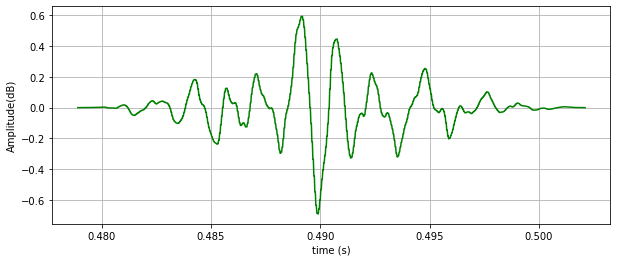

In [11]:

b = np.zeros((frames.shape[0], frames.shape[1]))
maxamplitude = 0
maxamplitude = 165

for i in range(0, frames.shape[0]):
    windown=np.hanning(wlen)  #調用漢明窗
    a=frames[i:i+1]
    b[i]=a[0]*windown
    if i == maxamplitude:
        plt.figure(figsize=(10,4))
        plt.plot(plt_time,b[i],c="g")
        plt.xlabel('time (s)')
        plt.ylabel('Amplitude(dB)')
        plt.grid()
        plt.savefig('preAnalysis_pic_output\\hammingwindow.png', facecolor = 'w')
        plt.show()

(512,)


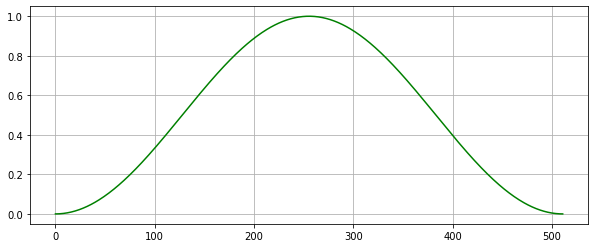

In [20]:
#加窗測試(找振幅最大)
windown=np.hanning(wlen)  #調用漢明窗
print(windown.shape)
windown_wlen = np.arange(0, wlen)
#a=frames[249:249+1]
#b=a[0]*windown
plt.figure(figsize=(10,4))
plt.plot(windown_wlen, windown,c="g")
plt.grid()
plt.savefig('C:\\Users\\user\\Desktop\\專題實作\\barking_sound_output\\hanning_window.png', facecolor = 'w')
plt.show()

## audio pre-emphasis

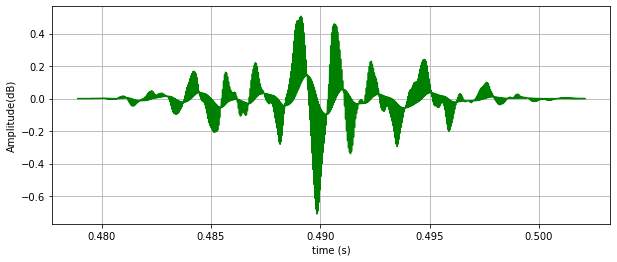

(1024,)
(2667, 1024)


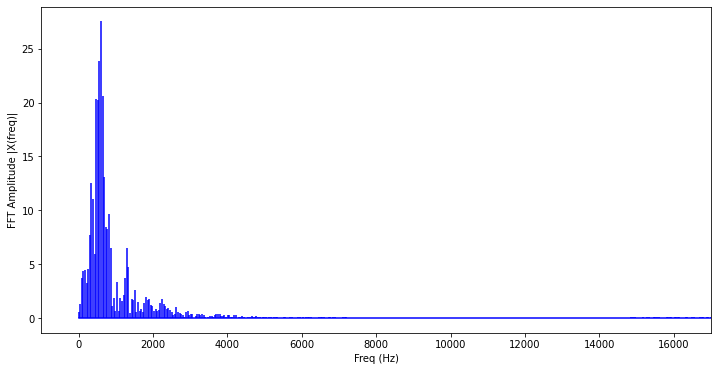

In [45]:
import math

def PreEmphasised(x):
    PointNumbers = len(x)
    PreEmphasis = x
    PointNumbers = int(PointNumbers)
    for i in range (1, PointNumbers):
        PreEmphasis[i] = PreEmphasis[i] - 0.97*PreEmphasis[i - 1]
    return(PreEmphasis)

y = np.zeros((b.shape[0], b.shape[1]))
for i in range(0, b.shape[0]):
    y[i] = PreEmphasised(b[i])
    if i == maxamplitude:
        plt.figure(figsize=(10,4))
        plt.plot(plt_time,y[i],c="g")
        plt.xlabel('time (s)')
        plt.ylabel('Amplitude(dB)')
        plt.grid()
        plt.savefig('barking_sound_output\\pre_emphasis.png', facecolor = 'w')
        plt.show()

from numpy.fft import fft
Xtest = fft(y[0])
print(Xtest.shape)
print(y.shape)
X = np.zeros((y.shape[0], len(Xtest)),dtype=np.complex_)
for i in range(0, y.shape[0]):
    X[i] = fft(y[i])
    N = len(X[0])
    n = np.arange(N)
    T = N/framerate
    freq = n/T 
    if i == maxamplitude:
        plt.figure(figsize = (12, 6))
        plt.stem(freq, np.abs(X[i]), 'b', \
                 markerfmt=" ", basefmt="-b")
        plt.xlabel('Freq (Hz)')
        plt.ylabel('FFT Amplitude |X(freq)|')
        plt.xlim(-1000, 17000)
        plt.show()

## FFT

(1024,)
(2667, 1024)


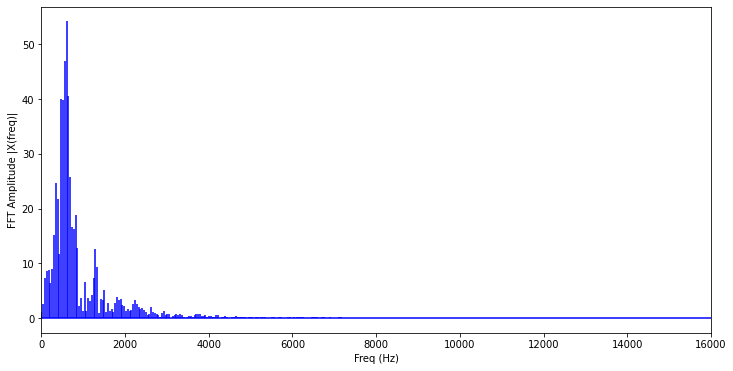

In [17]:
#FFT
from numpy.fft import fft

Xtest = fft(b[0])
print(Xtest.shape)
print(b.shape)
X = np.zeros((b.shape[0], len(Xtest)),dtype=np.complex_)
for i in range(0, b.shape[0]):
    X[i] = fft(b[i])
    N = len(X[0])
    n = np.arange(N)
    T = N/framerate
    freq = n/T 
    if i == maxamplitude:
        plt.figure(figsize = (12, 6))
        plt.stem(freq, np.abs(X[i]), 'b', \
                 markerfmt=" ", basefmt="-b")
        plt.xlabel('Freq (Hz)')
        plt.ylabel('FFT Amplitude |X(freq)|')
        plt.xlim(0, 16000)
        plt.savefig('preAnalysis_pic_output\\FFT.svg', facecolor = 'w')
        plt.show()

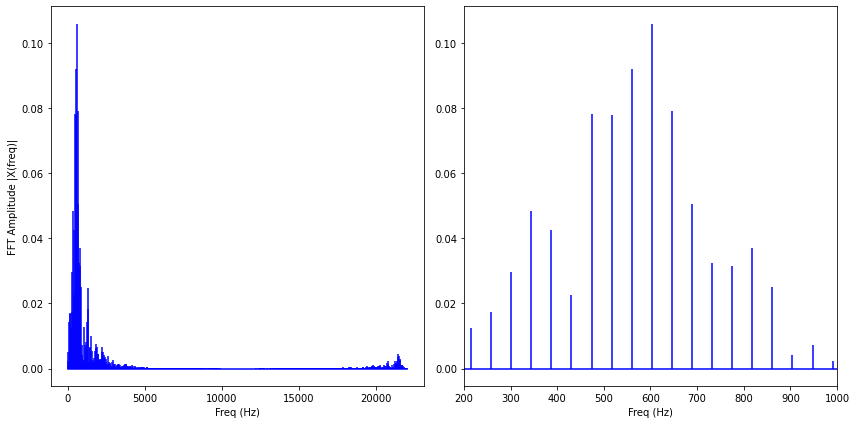

In [18]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside = np.zeros((X.shape[0], f_oneside.shape[0]),dtype=np.complex_)
for i in range (0, X.shape[0]):
    X_oneside[i] =X[i][:n_oneside]/n_oneside
    if i == maxamplitude:
        plt.figure(figsize = (12, 6))
        # sub plots two plot that in this row and this is the first plot
        plt.subplot(121)
        plt.stem(f_oneside, abs(X_oneside[i]), 'b', \
                 markerfmt=" ", basefmt="-b")
        plt.xlabel('Freq (Hz)')
        plt.ylabel('FFT Amplitude |X(freq)|')
        #plt.savefig('barking_sound_output\\FFT.png', facecolor = 'w')
        # sub plots two plot that in this row and this is the first plot
        plt.subplot(122)
        plt.stem(f_oneside, abs(X_oneside[i]), 'b', \
                 markerfmt=" ", basefmt="-b")
        plt.xlabel('Freq (Hz)')
        plt.xlim(200, 1000)
        plt.savefig('preAnalysis_pic_output\\FFT_detailed.png', facecolor = 'w')
        plt.tight_layout()
        plt.show()

## get absolute value

In [ ]:
abs_X = np.zeros((X_oneside.shape[0], X_oneside.shape[1]))
abs_X = np.abs(X_oneside)
print(abs_X.shape)

(5667, 256)


## get square value

In [19]:
square_X = np.zeros((X_oneside.shape[0], X_oneside.shape[1]))
square_X = np.square(np.abs(X_oneside))
print(square_X.shape)

(2667, 512)


## mel filter 

[    0.      38.51    79.14   122.01   167.24   214.95   265.29   318.39
   374.42   433.54   495.9    561.7    631.11   704.35   781.61   863.13
   949.13  1039.86  1135.58  1236.57  1343.12  1455.52  1574.11  1699.23
  1831.23  1970.49  2117.42  2272.43  2435.96  2608.5   2790.52  2982.56
  3185.17  3398.92  3624.43  3862.36  4113.37  4378.19  4657.58  4952.34
  5263.32  5591.4   5937.54  6302.72  6688.    7094.47  7523.3   7975.73
  8453.05  8956.63  9487.91 10048.43 10639.78 11263.67 11921.88 12616.31
 13348.94 14121.89 14937.35 15797.68 16705.35 17662.95 18673.24 19739.11
 20863.62 22050.  ]
(64, 512)


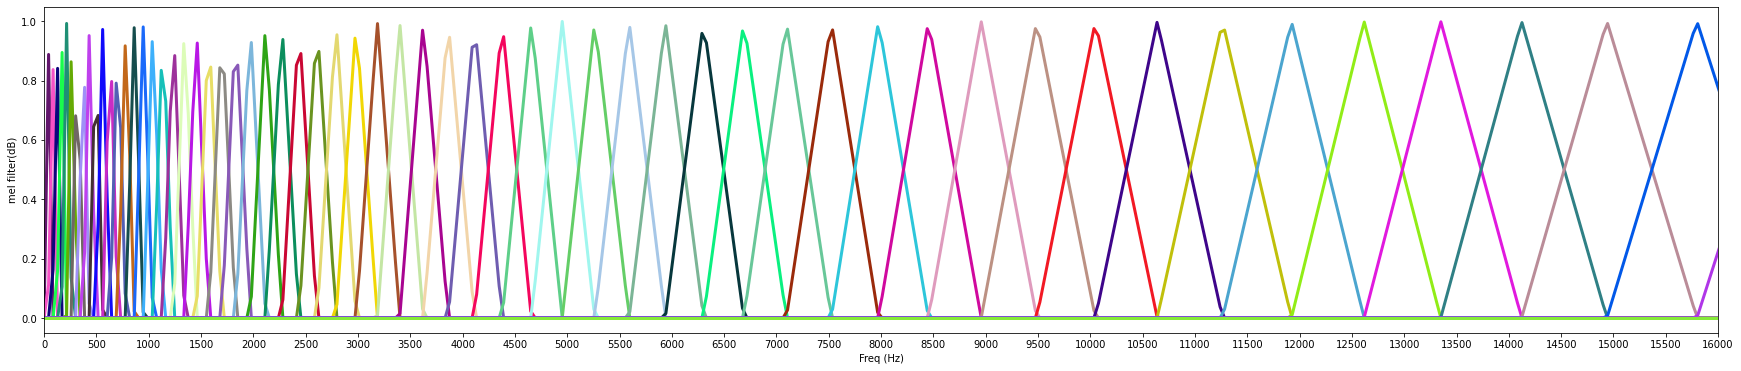

In [27]:
#頻率點數量
fp = n_oneside
#設計濾波器的最低頻率
fl = freq[0]
#設計濾波器的最高頻率
fh = freq[fp]
#print(f'maximum freq: {fh}')
#最低頻率對應的mel頻率
melfl = 2595.0 * np.log10(1 + fl/700.0)
#最高頻率對應的mel頻率
melfh = 2595.0 * np.log10(1 + fh/700.0)
# melfl 到 melfh 之間的濾波器個數
p = 64
#間隔點頻率(包括最低頻點及最高頻點)
MelF = np.linspace(melfl, melfh, p+2)
#將mel頻率轉回實際頻率
F = 700.0 * (10 ** (MelF/2595.0) - 1)
print(F)
bank = np.zeros((p, fp))

plt.figure(figsize = (30, 6))

for m in range(1, p+1):
    F_left = F[m - 1]
    F_mid = F[m]
    F_right = F[m + 1]
    for k in range(0, fp):
        
        if f_oneside[k] >= F_left and f_oneside[k] <= F_mid:
            bank[m - 1][k] = (f_oneside[k] - F_left)/(F_mid - F_left)
        elif f_oneside[k] > F_mid and f_oneside[k] <= F_right:
            bank[m - 1][k] = (F_right - f_oneside[k])/(F_right - F_mid)        
    plt.plot(f_oneside[:fp], bank[m - 1], c = np.random.rand(3,), linewidth=3)

print(bank.shape)
plt.xlabel('Freq (Hz)')
plt.ylabel('mel filter(dB)')
plt.xlim(0, 16000)
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(500))
plt.savefig('preAnalysis_pic_output\\mel_filter.svg', facecolor = 'w')
plt.show()        

In [44]:
import sys
np.set_printoptions(threshold=sys.maxsize)
#mel_X = np.matmul(abs_X, np.transpose(bank))
mel_X = np.matmul(square_X, np.transpose(bank))
#print(square_X) 
print(mel_X.shape)
#print(mel_X[:, 2])
#print(mel_X[maxamplitude])

(2667, 64)


## get logarithm value

c:\Users\user\anaconda3\envs\image_recognition\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


(2667, 64)


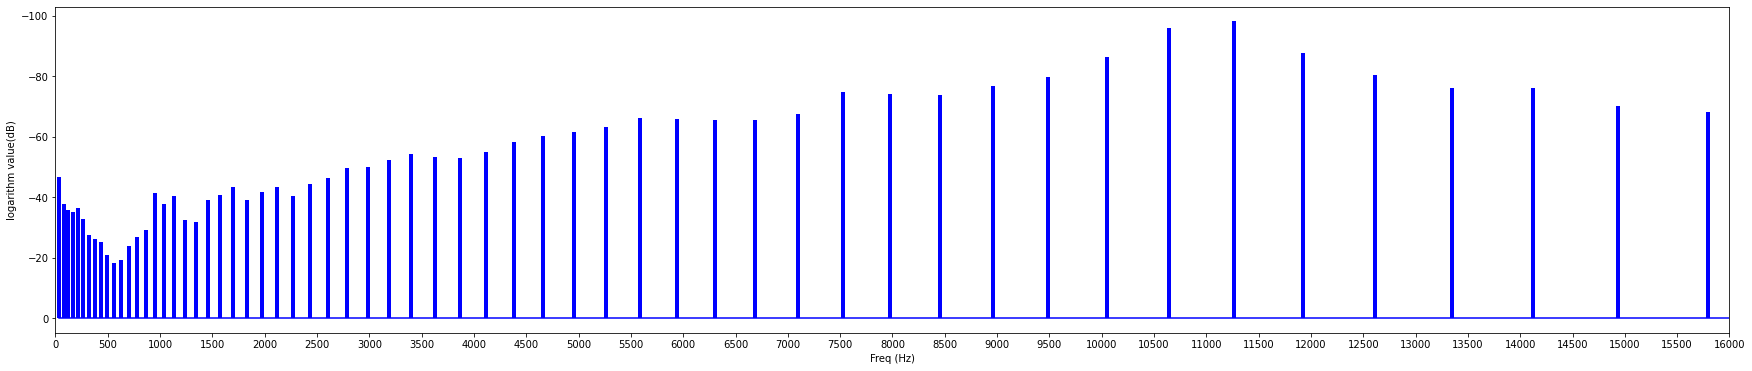

In [45]:
log_X = 10*np.log10(mel_X)
print(log_X.shape)
np.set_printoptions(precision = 2)
#print(log_X[0])
#print(log_X[maxamplitude])
plt.figure(figsize = (30, 6))
markerline, stemlines, baseline = plt.stem(F[1: F.shape[0] - 1], log_X[maxamplitude], 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('logarithm value(dB)')
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(500))
plt.setp(stemlines, 'linewidth', 4)
ax.invert_yaxis()
plt.xlim(0, 16000)
plt.savefig('preAnalysis_pic_output\\logarithm.svg', facecolor = 'w')
plt.show()

## DCT

In [ ]:
from scipy.fftpack import dct

num_ceps = 12 #可以在硬體省略
D = dct(log_X, type = 2, axis = 0, norm = 'ortho')[: ,1 : (num_ceps + 1)]
print(D.shape)
print(D[1])
print(D[maxamplitude])

(5667, 12)
[16.15 17.13 17.08 25.96 25.96 16.93  3.19  0.24 -3.46  4.1  10.97 11.39]
[ 0.71  0.36 -0.37 -0.86 -0.86  0.61  1.61  1.62  1.48  0.35 -0.45 -0.33]


### signal pre-processing preparation

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import time
import wave
import math
from numpy.fft import fft
import sys
import re
import scipy.io as scio

#### find signal size

In [ ]:
def findsize(path1, delay, index):
    wlen=1024
    inc=128

    f = wave.open(f'{path1}', "rb")
    params = f.getparams()
    nchannels, sampwidth, framerate, nframes = params[:4]
    str_data = f.readframes(nframes)
    wave_data = np.frombuffer(str_data, dtype=np.short)
    #wave_data = wave_data*1.0/(max(abs(wave_data)))
    time = np.arange(0, wlen) * (1.0 / framerate)
    fixed_signal = np.zeros(len(wave_data))
    if delay != 0:
        zeros=np.zeros(((wlen*delay),)) #在訊號前加0增加訓練集
        fixed_signal=np.concatenate((zeros,wave_data)) #填補後的信號記爲fixed_signal
    else:
        fixed_signal = wave_data
    #print(wave_data.dtype)
    signal_length=len(fixed_signal) #信號總長度
    if signal_length<=wlen: #若信號長度小於一個幀的長度，則幀數定義爲1
        nf=1
    else: #否則，計算幀的總長度
        nf=int(np.ceil((1.0*signal_length-wlen+inc)/inc))
    pad_length=int((nf-1)*inc+wlen) #所有幀加起來總的鋪平後的長度
    zeros=np.zeros((pad_length-signal_length,)) #不夠的長度使用0填補，類似於FFT中的擴充數組操作
    pad_signal=np.concatenate((fixed_signal,zeros)) #填補後的信號記爲pad_signal
    indices=np.tile(np.arange(0,wlen),(nf,1))+np.tile(np.arange(0,nf*inc,inc),(wlen,1)).T  #相當於對所有幀的時間點進行抽取，得到nf*nw長度的矩陣
    indices=np.array(indices,dtype=np.int32) #將indices轉化爲矩陣
    #print(indices.shape)
    size = indices.shape[0]
    return size

#### audio preprocessing

In [ ]:
def audioProcessing(path1, delay, index = 0, maxindex = 167):

    wlen=1024
    inc=128

    f = wave.open(f'{path1}', "rb")
    params = f.getparams()
    nchannels, sampwidth, framerate, nframes = params[:4]
    str_data = f.readframes(nframes)
    wave_data = np.frombuffer(str_data, dtype=np.short)
    #wave_data = wave_data*1.0/(max(abs(wave_data)))
    time = np.arange(0, wlen) * (1.0 / framerate)
    fixed_signal = np.zeros(len(wave_data))
    if delay != 0:
        zeros=np.zeros(((wlen*delay),)) #在訊號前加0增加訓練集
        #zeros=np.full(wlen*delay, 0.0001)
        fixed_signal=np.concatenate((zeros,wave_data)) #填補後的信號記爲fixed_signal
    else:
        fixed_signal = wave_data
    #print(wave_data.dtype)
    signal_length=len(fixed_signal) #信號總長度
    if signal_length<=wlen: #若信號長度小於一個幀的長度，則幀數定義爲1
        nf=1
    else: #否則，計算幀的總長度
        nf=int(np.ceil((1.0*signal_length-wlen+inc)/inc))
    pad_length=int((nf-1)*inc+wlen) #所有幀加起來總的鋪平後的長度
    zeros=np.zeros((pad_length-signal_length,)) #不夠的長度使用0填補，類似於FFT中的擴充數組操作
    pad_signal=np.concatenate((fixed_signal,zeros)) #填補後的信號記爲pad_signal
    indices=np.tile(np.arange(0,wlen),(nf,1))+np.tile(np.arange(0,nf*inc,inc),(wlen,1)).T  #相當於對所有幀的時間點進行抽取，得到nf*nw長度的矩陣
    #print(indices[:2])
    indices=np.array(indices,dtype=np.int32) #將indices轉化爲矩陣
    frames=pad_signal[indices] #得到幀信號
    totaltime = np.linspace(0, 1.0/framerate*nframes, signal_length)
    # plt.figure(figsize=(20,4))
    # plt.plot(totaltime, fixed_signal,c="g")
    # plt.xlabel('time (s)')
    # plt.ylabel('Amplitude(dB)')
    # plt.grid()
    # plt.savefig(f'barking_sound_output\\original_signal_{index}.png', facecolor = 'w')
    #plt.show()

    maxamplitude = maxindex #max amplitude 所在的窗
    plt_time = time + inc /framerate*maxamplitude
    # plt.figure(figsize=(10,4))
    # plt.plot(plt_time,frames[maxamplitude],c="g")
    # plt.xlabel('time (s)')
    # plt.ylabel('Amplitude(dB)')
    # plt.grid()
    # plt.savefig('barking_sound_output\\window_segement.png', facecolor = 'w')
    #plt.show()

    b = np.zeros((frames.shape[0], frames.shape[1]))
    for i in range(0, frames.shape[0]):
        windown=np.hamming(wlen)  #調用漢明窗
        a=frames[i:i+1]
        b[i]=a[0]*windown
        # if i == maxamplitude:
        #     plt.figure(figsize=(10,4))
        #     plt.plot(plt_time,b[i],c="g")
        #     plt.xlabel('time (s)')
        #     plt.ylabel('Amplitude(dB)')
        #     plt.grid()
        #     plt.savefig(f'barking_sound_output\\window_{index}.png', facecolor = 'w')
        #     plt.show()

    def PreEmphasised(x):
        PointNumbers = len(x)
        PreEmphasis = x
        PointNumbers = int(PointNumbers)
        for i in range (1, PointNumbers):
            PreEmphasis[i] = PreEmphasis[i] - 0.97*PreEmphasis[i - 1]
        return(PreEmphasis)

    y = np.zeros((b.shape[0], b.shape[1]))
    for i in range(0, b.shape[0]):
        y[i] = PreEmphasised(b[i])
        # if i == maxamplitude:
        #     plt.figure(figsize=(10,4))
        #     plt.plot(plt_time,y[i],c="g")
        #     plt.xlabel('time (s)')
        #     plt.ylabel('Amplitude(dB)')
        #     plt.grid()
        #     plt.savefig(f'barking_sound_output\\pre_emphasis_{index}.png', facecolor = 'w')
        #     plt.show()
    #FFT

    Xtest = fft(y[0])
    X = np.zeros((y.shape[0], len(Xtest)),dtype=np.complex_)

    for i in range(0, y.shape[0]):
        X[i] = fft(y[i])
        N = len(X[0])
        n = np.arange(N)
        T = N/framerate
        freq = n/T 

    n_oneside = N//2

    # 取頻率點
    freq20000 = 0
    for i in range(n_oneside):
        if(freq[i] > 20000):
            freq20000 = i - 1
            break
    # get the one side frequency
    #f_oneside = freq[:n_oneside]
    f_oneside = freq[:freq20000]

    # normalize the amplitude
    #X_oneside = np.zeros((X.shape[0], f_oneside.shape[0]),dtype=np.complex_)
    X_oneside = np.zeros((X.shape[0], f_oneside.shape[0]),dtype=np.complex_)
    for i in range (0, X.shape[0]):
        #X_oneside[i] =X[i][:n_oneside]/n_oneside
        X_oneside[i] =X[i][:freq20000]/freq20000

        # if index == 22:
        #     plt.figure(figsize = (12, 6))
        #     # sub plots two plot that in this row and this is the first plot
        #     plt.subplot(121)
        #     plt.stem(f_oneside, abs(X_oneside[i][:freq20000]), 'b', markerfmt=" ", basefmt="-b")
        #     plt.xlabel('Freq (Hz)')
        #     plt.ylabel('FFT Amplitude |X(freq)|')
        #     plt.subplot(122)
        #     plt.stem(f_oneside, abs(X_oneside[i][:freq20000]), 'b', markerfmt=" ", basefmt="-b")
        #     plt.xlabel('Freq (Hz)')
        #     plt.xlim(0, 300)
        #     plt.savefig(f'barking_sound_output\\FFT_detailed_{index}.png', facecolor = 'w')
        #     plt.tight_layout()
        #     plt.show()
    
    square_X = np.zeros((X_oneside.shape[0], X_oneside.shape[1]))
    square_X = np.square(np.abs(X_oneside))
    # min_positive_float = np.finfo(float).eps
    # for i in range(square_X.shape[0]):
    #     for j in range(square_X.shape[1]):
    #         if square_X[i][j] == 0:
    #             square_X[i][j] = min_positive_float
    
    #頻率點數量
    #fp = n_oneside
    fp = freq20000
    #設計濾波器的最低頻率
    fl = freq[0]
    #設計濾波器的最高頻率
    fh = freq[fp]
    #print(f'maximum freq: {fh}')
    #最低頻率對應的mel頻率
    melfl = 2595.0 * np.log10(1 + fl/700.0)
    #最高頻率對應的mel頻率
    melfh = 2595.0 * np.log10(1 + fh/700.0)
    # melfl 到 melfh 之間的濾波器個數
    p = 64
    #間隔點頻率(包括最低頻點及最高頻點)
    MelF = np.linspace(melfl, melfh, p+2)
    #將mel頻率轉回實際頻率
    F = 700.0 * (10 ** (MelF/2595.0) - 1)
    bank = np.zeros((p, fp))

    #plt.figure(figsize = (30, 6))

    for m in range(1, p+1):
        F_left = F[m - 1]
        F_mid = F[m]
        F_right = F[m + 1]
        for k in range(0, fp):
            
            if f_oneside[k] >= F_left and f_oneside[k] <= F_mid:
                bank[m - 1][k] = (f_oneside[k] - F_left)/(F_mid - F_left)
            elif f_oneside[k] > F_mid and f_oneside[k] <= F_right:
                bank[m - 1][k] = (F_right - f_oneside[k])/(F_right - F_mid)        
        # plt.plot(f_oneside[:fp], bank[m - 1], c = np.random.rand(3,))

    # plt.xlabel('Freq (Hz)')
    # plt.ylabel('mel filter(dB)')
    # plt.xlim(0, 8000)
    # ax = plt.gca()
    # ax.xaxis.set_major_locator(plt.MultipleLocator(500))
    # plt.savefig(f'barking_sound_output\\mel_filter_{index}.png', facecolor = 'w')
    #plt.show()

    #mel_X = np.matmul(abs_X, np.transpose(bank))
                
    # if index == 1:
    #     dataNew = 'melbank.mat'
    #     mdic = {"melbank": bank, "label": "experiment"}
    #     scio.savemat('melbank.mat', mdic)

    mel_X = np.matmul(square_X, np.transpose(bank))

    min_positive_float = np.finfo(float).eps
    for i in range(mel_X.shape[0]):
        for j in range(mel_X.shape[1]):
            if mel_X[i][j] == 0:
                mel_X[i][j] = min_positive_float

    log_X = 10* np.log10(mel_X)
    #print (log_X[maxamplitude])
    # plt.figure(figsize = (30, 6))
    # plt.stem(F[1: F.shape[0] - 1], log_X[maxamplitude], 'b', markerfmt=" ", basefmt="-b")
    # plt.xlabel('Freq (Hz)')
    # plt.ylabel('logarithm value(dB)')
    # ax = plt.gca()
    # ax.xaxis.set_major_locator(plt.MultipleLocator(500))
    # ax.invert_yaxis()
    # plt.xlim(0, 8000)
    # plt.savefig(f'barking_sound_output\\logarithm_{index}.png', facecolor = 'w')
    return log_X    

### signal without car-crashing (ESC50)

In [ ]:
filepath1 = 'car_crash_dataset/ESC50/car_horn'
signal1 = np.zeros((1, 64, 64)) #car_horn 8音檔
index = 1
maxindex = 4574
#原始音檔 & 修改音檔增加訓練資料
for file in os.listdir(filepath1):
    path1 = filepath1 + '/' + file
    for i in range(7): #i 表示平移量
        signal_size = findsize(path1, i, index)
        #print(f'file name: {file}, 平移量: {i}, signal size: {signal_size}')
        temp_signal = np.zeros((signal_size, 64))
        temp_signal = audioProcessing(path1, i, index, maxindex)
        num_matrices = temp_signal.shape[0] // 64
        # 使用 numpy.reshape 將原始陣列轉換為三維矩陣
        signal1 = np.append(signal1, temp_signal[:num_matrices * 64, :].reshape((num_matrices, 64, 64)), axis = 0)
        index += 1
signal1 = np.delete(signal1, 0, axis=0)
print(f'signal1 size: {signal1.shape}')

filepath2 = 'car_crash_dataset/ESC50/engine'        
signal2 = np.zeros((1, 64, 64)) #engine 15音檔
index = 1
#原始音檔 & 修改音檔增加訓練資料
for file in os.listdir(filepath2):
    path2 = filepath2 + '/' + file
    for i in range(5): #i 表示平移量
        signal_size = findsize(path2, i, index)
        #print(f'file name: {file}, 平移量: {i}, signal size: {signal_size}')
        temp_signal = np.zeros((signal_size ,64))
        temp_signal = audioProcessing(path2, i, index, maxindex)
        num_matrices = temp_signal.shape[0] // 64
        # 使用 numpy.reshape 將原始陣列轉換為三維矩陣
        signal2 = np.append(signal2, temp_signal[:num_matrices * 64, :].reshape((num_matrices, 64, 64)), axis = 0)
        index += 1
signal2 = np.delete(signal2, 0, axis=0)
print(f'signal2 size: {signal2.shape}')

filepath3 = 'car_crash_dataset/soundsnap/non_car_crash'        
signal3 = np.zeros((1, 64, 64)) #sound snap
index = 1
#原始音檔 & 修改音檔增加訓練資料
for file in os.listdir(filepath3):
    path3 = filepath3 + '/' + file
    for i in range(5): #i 表示平移量
        signal_size = findsize(path3, i, index)
        #print(f'file name: {file}, 平移量: {i}, signal size: {signal_size}')
        temp_signal = np.zeros((signal_size ,64))
        temp_signal = audioProcessing(path3, i, index, maxindex)
        num_matrices = temp_signal.shape[0] // 64
        # 使用 numpy.reshape 將原始陣列轉換為三維矩陣
        signal3 = np.append(signal3, temp_signal[:num_matrices * 64, :].reshape((num_matrices, 64, 64)), axis = 0)
        index += 1
signal3 = np.delete(signal3, 0, axis=0)
print(f'signal3 size: {signal3.shape}')

#設定標籤
labels = np.asarray(["yes", "no"])
train_labels = []
test_labels = []

#signal1
trainsize1 = signal1.shape[0] // 4 * 3
testsize1 = signal1.shape[0]


#signal2
trainsize2 = signal2.shape[0] // 4 * 3
testsize2 = signal2.shape[0]

#signal3
trainsize3 = signal3.shape[0] // 4 * 3
testsize3 = signal3.shape[0]

#處理label和signal的關聯性
traindataset = signal1[0:trainsize1].reshape(trainsize1 ,64, 64, 1)
traindataset = np.append(traindataset, signal2[0:trainsize2].reshape(trainsize2 ,64, 64, 1), axis = 0)
traindataset = np.append(traindataset, signal3[0:trainsize3].reshape(trainsize3 ,64, 64, 1), axis = 0)
testdataset = signal1[trainsize1:testsize1].reshape((testsize1 - trainsize1) ,64, 64, 1)
testdataset = np.append(testdataset, signal2[trainsize2:testsize2].reshape((testsize2 - trainsize2) ,64, 64, 1), axis = 0)
testdataset = np.append(testdataset, signal3[trainsize3:testsize3].reshape((testsize3 - trainsize3) ,64, 64, 1), axis = 0)

for i in range(traindataset.shape[0]):
    train_labels.append("no")
for i in range(testdataset.shape[0]):
    test_labels.append("no")

print(f'train dataset size: {traindataset.shape[0]}, train label size: {len(train_labels)}')
print(f'test dataset size: {testdataset.shape[0]}, test label size: {len(test_labels)}')

# (X_train, y_train) = (traindataset, train_labels)
# (X_test, y_test) = (testdataset, test_labels)

# def tran_y(y):
#     y_ohe = np.zeros(2)
#     if y == "yes":
#         y_ohe[1] = 1
#     else:
#         y_ohe[0] = 1
#     return y_ohe

# y_train_ohe = np.array([tran_y(y_train[i]) for i in range(len(y_train))])
# y_test_ohe = np.array([tran_y(y_test[i]) for i in range(len(y_test))])
print("done")

signal1 size: (1496, 64, 64)
signal2 size: (1995, 64, 64)
signal3 size: (8009, 64, 64)
train dataset size: 8622, train label size: 8622
test dataset size: 2878, test label size: 2878
done


#### label signal for soundsnap

In [ ]:
def label_signal(path3, delay, index, timepoints):
    temp_label = [] # 'yes' or 'no'

    wlen=1024
    inc=128

    f = wave.open(f'{path3}', "rb")
    params = f.getparams()
    nchannels, sampwidth, framerate, nframes = params[:4]
    str_data = f.readframes(nframes)
    wave_data = np.frombuffer(str_data, dtype=np.short)
    #wave_data = wave_data*1.0/(max(abs(wave_data)))
    time = np.arange(0, wlen) * (1.0 / framerate)
    time_points = [point*framerate for point in timepoints] #秒轉為取樣點數
    fixed_signal = np.zeros(len(wave_data))
    if delay != 0:
        zeros=np.zeros(((wlen*delay),)) #在訊號前加0增加訓練集
        time_points = [(point + wlen*delay) for point in time_points] #標記時間軸加延遲
        fixed_signal=np.concatenate((zeros,wave_data)) #填補後的信號記爲fixed_signal
    else:
        fixed_signal = wave_data
    #print(wave_data.dtype)
    signal_length=len(fixed_signal) #信號總長度
    if signal_length<=wlen: #若信號長度小於一個幀的長度，則幀數定義爲1
        nf=1
    else: #否則，計算幀的總長度
        nf=int(np.ceil((1.0*signal_length-wlen+inc)/inc))
        time_points = [int(np.ceil((1.0*point-wlen+inc)/inc)) for point in time_points]
    pad_length=int((nf-1)*inc+wlen) #所有幀加起來總的鋪平後的長度
    zeros=np.zeros((pad_length-signal_length,)) #不夠的長度使用0填補，類似於FFT中的擴充數組操作
    pad_signal=np.concatenate((fixed_signal,zeros)) #填補後的信號記爲pad_signal
    indices=np.tile(np.arange(0,wlen),(nf,1))+np.tile(np.arange(0,nf*inc,inc),(wlen,1)).T  #相當於對所有幀的時間點進行抽取，得到nf*nw長度的矩陣
    indices=np.array(indices,dtype=np.int32) #將indices轉化爲矩陣
    temp_label = (["no"]* indices.shape[0])
    #包括車禍事件時間標記
    temp_label[time_points[0]: time_points[1]] = ["yes"]* len(temp_label[time_points[0]: time_points[1]])   

    return temp_label

### signal with car-crashing (soundsnap)

In [ ]:
filepath3 = 'car_crash_dataset/soundsnap/0s'
textfile = 'car_crash_dataset/soundsnap/audio_log.txt'
signal3 = np.zeros((1, 64, 64)) #car_horn 8音檔
soundsnap_label = []
timepoints = []
# 打開文件以讀取模式
with open(textfile, 'r') as file:
    # 逐行讀取文件
    for line in file:
        # 使用 split 函數將每行按空格分割
        parts = line.split()

        # 如果每行的部分數量足夠，取出最後兩個時間點
        if len(parts) >= 3:
            time_points_str = parts[-1].split('/')
            # 將得到的兩個子串轉換為浮點數
            for point in time_points_str:
                 timepoints.append(float(point))
            #print("Time points:", timepoints[-2], timepoints[-1])

index = 1
maxindex = 20
timepointscount = 0 
#原始音檔 & 修改音檔增加訓練資料
for file in os.listdir(filepath3):
    path3 = filepath3 + '/' + file
    for i in range(7): #i 表示平移量      
        signal_size = findsize(path3, i, index)
        #print(f'file name: {file}, 平移量: {i}, signal size: {signal_size}')
        #print(timepointscount)
        temp_signal = np.zeros((signal_size, 64))
        temp_label = []
        temp_label = label_signal(path3, i, index, timepoints[timepointscount*2 : (timepointscount + 1)*2])
        temp_signal = audioProcessing(path3, i, index, maxindex)
        #labelCounting(temp_signal.shape[0], temp_label)
        num_matrices = temp_signal.shape[0] // 64
        # 使用 numpy.reshape 將原始陣列轉換為三維矩陣
        signal3 = np.append(signal3, temp_signal[:num_matrices * 64, :].reshape((num_matrices, 64, 64)), axis = 0)
        for k in range(len(temp_label)//64):
            for j in range(64):
                if temp_label[k*64 + j] == 'yes':
                    soundsnap_label.append('yes')
                    break
                elif j == 63:
                    soundsnap_label.append('no')
        index += 1
    timepointscount += 1
signal3 = np.delete(signal3, 0, axis=0)
print(f'signal3 size: {signal3.shape}, label size: {len(soundsnap_label)}')

signal3 size: (109194, 64, 64), label size: 109194


#### 將singal3(soundsnap)音檔中非車禍事件的頻譜圖刪除 (避免非車禍事件頻譜圖數量遠大於包括車禍事件的頻譜圖)

In [ ]:
#將singal3的非車禍資料去除
new_signal3 = np.zeros((1, 64, 64))
new_soundsnap_label = []
for i in range(signal3.shape[0]):
    if soundsnap_label[i] == "yes":
        new_signal3 = np.append(new_signal3, signal3[i].reshape((1, 64, 64)), axis = 0)
        new_soundsnap_label.append("yes")
        #print(i)
new_signal3 = np.delete(new_signal3, 0, axis=0)   
print(f'car crash signal: {new_signal3.shape[0]}, label size: {len(new_soundsnap_label)}')

car crash signal: 11598, label size: 11598


### 將各個資料集及標籤合併

In [ ]:
#設定標籤
labels = np.asarray(["yes", "no"])

#signal3 要修改-根據時間軸標記車禍事件發生點
trainsize4 = new_signal3.shape[0] // 4 * 3
testsize4 = new_signal3.shape[0]



#處理label和signal的關聯性
for i in range(len(new_soundsnap_label)):
    if i < trainsize4:
        train_labels.append(new_soundsnap_label[i])
    else:
        test_labels.append(new_soundsnap_label[i])


traindataset = np.append(traindataset, new_signal3[0:trainsize4].reshape(trainsize4 ,64, 64, 1), axis = 0)
testdataset = np.append(testdataset, new_signal3[trainsize4:testsize4].reshape((testsize4 - trainsize4) ,64, 64, 1), axis = 0)
print("done")

done


### upload feature map data 

In [ ]:
train_label_file = './car_crash_dataset/train_label_freq20000withoutNorm.txt'
test_label_file = './car_crash_dataset/test_label_freq20000withoutNorm.txt'
train_database_file = './car_crash_dataset/train_database_freq20000withoutNorm.txt'
test_database_file = './car_crash_dataset/test_database_freq20000withoutNorm.txt'

with open(train_label_file, 'w') as file:
    
    file.write(f'{len(train_labels)}\n')
    for i in range(len(train_labels)):
        file.write(f'{train_labels[i]}\n')

with open(test_label_file, 'w') as file:
    
    file.write(f'{len(test_labels)}\n')
    for i in range(len(test_labels)):
        file.write(f'{test_labels[i]}\n')

with open(train_database_file, 'w') as file:
    
    file.write(f'{traindataset.shape[0]},64,64,1\n')
    for i in range(traindataset.shape[0]):
        for j in range(64):
            for k in range(64):
                file.write(f'{traindataset[i][j][k][0]}')
                if k < 63:
                    file.write(',')
                else:
                    file.write('\n')

with open(test_database_file, 'w') as file:
    
    file.write(f'{testdataset.shape[0]},64,64,1\n')
    for i in range(testdataset.shape[0]):
        for j in range(64):
            for k in range(64):
                file.write(f'{testdataset[i][j][k][0]}')
                if k < 63:
                    file.write(',')
                else:
                    file.write('\n')


print('data uploaded!')

data uploaded!


### download feature map data

In [ ]:
train_label_file = './car_crash_dataset/train_label_freq20000withoutNorm.txt'
test_label_file = './car_crash_dataset/test_label_freq20000withoutNorm.txt'
train_database_file = './car_crash_dataset/train_database_freq20000withoutNorm.txt'
test_database_file = './car_crash_dataset/test_database_freq20000withoutNorm.txt'

with open(train_label_file, 'r') as file:
    
    lines = file.readlines()

train_labels_size = int(lines[0])
train_labels = []
for i in range(1, (train_labels_size + 1)):
    lines[i] = lines[i].strip("\n")
    train_labels.append(lines[i])
print(f'train labels size: {len(train_labels)}')

with open(test_label_file, 'r') as file:
    
    lines = file.readlines()

test_labels_size = int(lines[0])
test_labels = []
for i in range(1, (test_labels_size + 1)):
    lines[i] = lines[i].strip("\n")
    test_labels.append(lines[i])
print(f'test labels size: {len(test_labels)}')

with open(train_database_file, 'r') as file:
    
    lines = file.readlines()
traindataset_size = int((lines[0].split(','))[0])
traindataset = np.zeros((traindataset_size, 64, 64, 1))
for i in range(traindataset_size):
    for j in range(64):
        numbers = lines[i* 64 + j + 1].split(',')
        numbers = [float(num) for num in numbers]
        for k in range(64):
            traindataset[i][j][k][0] = numbers[k]
print(f'train dataset size: {traindataset.shape[0]}')

with open(test_database_file, 'r') as file:
    
    lines = file.readlines()
testdataset_size = int((lines[0].split(','))[0])
testdataset = np.zeros((testdataset_size, 64, 64, 1))
for i in range(testdataset_size):
    for j in range(64):
        numbers = lines[i* 64 + j + 1].split(',')
        numbers = [float(num) for num in numbers]
        for k in range(64):
            testdataset[i][j][k][0] = numbers[k]
print(f'test dataset size: {testdataset.shape[0]}')


print('data downloaded!')

train labels size: 11169
test labels size: 3727
train dataset size: 11169
test dataset size: 3727
data downloaded!


In [ ]:
(X_train, y_train) = (traindataset, train_labels)
(X_test, y_test) = (testdataset, test_labels)
print(f'train dataset size: {len(X_train)}, train labels size: {len(y_train)}')
print(f'test dataset size: {len(X_test)}, test label size: {len(y_test)}')

def tran_y(y):
    y_ohe = np.zeros(2)
    if y == "yes":
        y_ohe[1] = 1
    else:
        y_ohe[0] = 1
    return y_ohe

y_train_ohe = np.array([tran_y(y_train[i]) for i in range(len(y_train))])
y_test_ohe = np.array([tran_y(y_test[i]) for i in range(len(y_test))])
print("done")

train dataset size: 17319, train labels size: 17319
test dataset size: 5779, test label size: 5779
done


### 顯示含車禍及不含車禍事件資料比例

In [ ]:
#輸出含有車禍及不含有車禍事件的資料集比例
train_yes = 0
train_no = 0
for i in y_train:
    if i == "yes":
        train_yes += 1
    else:
        train_no += 1
print(f'train dataset:  yes: {train_yes}, no: {train_no}')
test_yes = 0
test_no = 0
for i in y_test:
    if i == "yes":
        test_yes += 1
    else:
        test_no += 1
print(f'test dataset:  yes: {test_yes}, no: {test_no}')


train dataset:  yes: 8697, no: 8622
test dataset:  yes: 2901, no: 2878


### Neuro Network preparation

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Layer, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


#確認tensorflow是否有偵測到gpu
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.6.2
Num GPUs Available:  1


### Neuro Network construction & training

In [ ]:
#precision: mixed_float16
image_gen = ImageDataGenerator(
    height_shift_range=.15,
    vertical_flip = True
)
image_gen.fit(X_train)
image_gen.fit(X_test)

# Split your data into training and validation sets
X_train, X_val, y_train_ohe, y_val_ohe = train_test_split(X_train, y_train_ohe, test_size=0.25, random_state=42)

tf.keras.mixed_precision.set_global_policy('mixed_float16')
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = 'same', input_shape = (64, 64, 1), activation = 'relu6'))
print(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = 'same', input_shape = (64, 64, 1), activation = 'relu6').dtype_policy)
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(128, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu6'))
model.add(MaxPooling2D(pool_size = (2, 2)))
#model.add(Conv2D(256, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu6'))
model.add(Conv2D(256, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu6'))
model.add(MaxPooling2D(pool_size = (2, 2)))
#model.add(Conv2D(512, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu6'))
model.add(Conv2D(512, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu6'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu6'))
model.add(Conv2D(16, kernel_size = (1, 1), strides = (1, 1), padding = 'same', activation = 'relu6'))
model.add(Flatten())
model.add(Dense(2, activation = 'softmax'))
#opt = keras.optimizers.Adam(learning_rate=0.4)
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
print(model.summary())
history = model.fit(image_gen.flow(X_train, y_train_ohe, batch_size = 64), validation_data = (X_val, y_val_ohe), epochs = 30, shuffle = True,)
print('training done')
score = model.evaluate(X_test, y_test_ohe, verbose = 1)
print('test loss', score[0])
print('test accuracy', score[1])

In [ ]:
# 在不需要模型時，清除 TensorFlow 圖中的變量和模型
tf.keras.backend.clear_session()

#### shuffleNet CNN testing

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.callbacks import LearningRateScheduler
from keras.models import Model
from keras.layers import Input, Conv2D, Dropout, Dense, GlobalAveragePooling2D, Concatenate, AveragePooling2D
from keras.layers import Activation, BatchNormalization, add, Reshape, ReLU, DepthwiseConv2D, MaxPooling2D, Lambda
from keras.utils.vis_utils import plot_model
from keras import backend as K
from tensorflow.keras.optimizers import SGD

from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [ ]:
#precision: mixed_float16
image_gen = ImageDataGenerator(
    height_shift_range=.15,
    vertical_flip = True
)
image_gen.fit(X_train)
image_gen.fit(X_test)

# # Split your data into training and validation sets
# X_train, X_val, y_train_ohe, y_val_ohe = train_test_split(X_train, y_train_ohe, test_size=0.25, random_state=42)

tf.keras.mixed_precision.set_global_policy('mixed_float16')

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3070 Laptop GPU, compute capability 8.6


In [ ]:
def _group_conv(x, filters, kernel, stride, groups):
    channel_axis = 1 if K.image_data_format() == 'channels_first' else -1
    in_channels = K.int_shape(x)[channel_axis]

    #number of input channels per group
    nb_ig = in_channels // groups
    #number of output channels per group
    nb_og = filters // groups

    gc_list = []
    #Determine whether the number of filters is divisible by the number of groups
    assert filters % groups == 0

    for i in range(groups):
        if channel_axis == -1:
            x_group = Lambda(lambda z: z[:, :, :, i * nb_ig: (i + 1) * nb_ig])(x)
        else:
            x_group = Lambda(lambda z: z[:, i * nb_ig: (i + 1) * nb_ig, :, :])(x)
        gc_list.append(Conv2D(filters = nb_og, kernel_size = kernel, strides = stride, padding = 'same', use_bias = False)(x_group))
    
    return Concatenate(axis = channel_axis)(gc_list)

def _channel_shuffle(x, groups):
    if K.image_data_format() == 'channels_last':
        height, width, in_channels = K.int_shape(x)[1:]
        channels_per_group = in_channels // groups
        pre_shape = [-1, height, width, groups, channels_per_group]
        dim = (0, 1, 2, 4, 3)
        later_shape = [-1, height, width, in_channels]
    else:
        in_channels, height, width = K.int_shape(x)[1:]
        channels_per_group = in_channels // groups
        pre_shape = [-1, groups, channels_per_group, height, width]
        dim = (0, 2, 1, 3, 4)
        later_shape = [-1, in_channels, height, width]

    #print(f"before reshape: {K.int_shape(x)}")
    x = Lambda(lambda z: K.reshape(z, pre_shape))(x)
    #print(f"After reshape: {K.int_shape(x)}")
    x = Lambda(lambda z: K.permute_dimensions(z, dim))(x)
    #print(f"After permute_dimensions: {K.int_shape(x)}")
    x = Lambda(lambda z: K.reshape(z, later_shape))(x)
    #print(f"After reshape (final): {K.int_shape(x)}")

    return x

def _shuffleNet_unit(inputs, filters, kernel, stride, groups, stage, bottleneck_ratio = 0.25):
    channel_axis = 1 if K.image_data_format() == 'channels_first' else -1
    in_channels = K.int_shape(inputs)[channel_axis]
    bottleneck_channels = int(filters * bottleneck_ratio)

    def relu6(x):
        return K.relu(x, max_value=6.0)

    if stage == 2:
        x = Conv2D(filters = bottleneck_channels, kernel_size = (1, 1), strides = 1, padding = 'same', use_bias = False)(inputs)
    else:
        x = _group_conv(inputs, bottleneck_channels, (1, 1), 1, groups)
    
    #x = BatchNormalization(axis = channel_axis, momentum=0.9, epsilon=1e-5)(x)
    x = Activation(relu6)(x)

    x = _channel_shuffle(x, groups)

    x = DepthwiseConv2D(kernel_size = kernel, strides = stride, depth_multiplier = 1, padding = 'same', use_bias = False)(x)

    #x = BatchNormalization(axis = channel_axis, momentum=0.9, epsilon=1e-5)(x)

    if stride == 2:
        x = _group_conv(x, filters - in_channels, (1, 1), 1, groups)
        #x = BatchNormalization(axis = channel_axis, momentum=0.9, epsilon=1e-5)(x)
        #avg = AveragePooling2D(pool_size = (3, 3), strides = 2, padding = 'same')(inputs)
        avg = AveragePooling2D(pool_size = (2, 2), strides = 2, padding = 'same')(inputs)
        #avg = MaxPooling2D(pool_size = (3, 3), strides = 2, padding = 'same')(inputs)
        x = Concatenate(axis = channel_axis)([avg, x])
    else:
        x = _group_conv(x, filters, (1, 1), 1, groups)
        #x = BatchNormalization(axis = channel_axis, momentum=0.9, epsilon=1e-5)(x)
        x = add([inputs, x])
    
    x = Activation(relu6)(x)

    return x

def _stage(x, filters, kernel, groups, repeat, stage):
    x = _shuffleNet_unit(x, filters, kernel, 2, groups, stage)

    for i in range(1, repeat):
        x = _shuffleNet_unit(x, filters, kernel, 1, groups, stage)
    
    return x

def ShuffleNet(input_shape, classes):
    inputs = Input(shape = input_shape)


    def relu6(x):
        return K.relu(x, max_value=6.0)
    
    x = Conv2D(16, (3, 3), strides = 2, padding = 'same', use_bias = True)(inputs)
    x = Activation(relu6)(x)
    x = MaxPooling2D(pool_size = (3, 3), strides = 2, padding = 'same')(x)

    x = _stage(x, filters = 32, kernel = (3, 3), groups = 2, repeat = 2, stage = 2)# repeat = 4
    x = _stage(x, filters = 64, kernel = (3, 3), groups = 2, repeat = 4, stage = 3)# repeat = 8
    #x = _stage(x, filters = 128, kernel = (3, 3), groups = 2, repeat = 4, stage = 4)

    x = GlobalAveragePooling2D()(x)

    x = Dense(2, activation = 'softmax')(x)
    predicts = Activation('softmax')(x)

    model = Model(inputs, predicts)

    return model

In [ ]:
if __name__ == '__main__':
    recent_score = 0.9
    recent_loss = 0.0
    recent_f1score = 0.0
    history_accuracy = []
    history_loss = []
    while 1:
        model = ShuffleNet((64, 64, 1), classes = 2)
        model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001, clipvalue=0.5), metrics = ['accuracy']) #0.001
        #print(model.summary())
        history = model.fit(image_gen.flow(X_train, y_train_ohe, batch_size = 64), #64
                            validation_data = (X_val, y_val_ohe), 
                            epochs = 200,  # 30
                            shuffle = True,)
        #print('training done')
        score = model.evaluate(X_test, y_test_ohe, verbose=1)
        #print('test loss', score[0])
        #print('test accuracy', score[1])
        history_accuracy.append(score[1])
        history_loss.append(score[0])
        if score[1] < 0.95:
            if score[1] > recent_score:

                y_true_np = np.zeros(y_test_ohe.shape[0])
                for i in range(y_test_ohe.shape[0]):
                    if y_test_ohe[i][1] == 1:
                        y_true_np[i] = 1
                y_pred_list = model.predict(X_test)
                y_pred_np = np.zeros(len(y_pred_list))
                for i in range(len(y_pred_list)):
                    if y_pred_list[i][1] > y_pred_list[i][0]:
                        y_pred_np[i] = 1
                # 使用 scikit-learn 函式計算 F1 score
                recent_f1score = f1_score(y_true_np, tf.round(y_pred_np))
                #print("F1 Score (Scikit-learn):", f1_sklearn)

                # summarize history for accuracy
                plt.plot(history.history['accuracy'])
                plt.plot(history.history['val_accuracy'])
                plt.title('model accuracy')
                plt.ylabel('accuracy')
                plt.xlabel('epoch')
                plt.legend(['train', 'validation'], loc='upper left')
                plt.savefig('accuracy_plot.png')
                plt.show()
                # summarize history for loss
                plt.plot(history.history['loss'])
                plt.plot(history.history['val_loss'])
                plt.title('model loss')
                plt.ylabel('loss')
                plt.xlabel('epoch')
                plt.legend(['train', 'validation'], loc='upper left')
                plt.savefig('loss_plot.png')
                plt.show()

                recent_score = score[1]
                recent_loss = score[0]
                model.save('shuffleNet_v1_new.h5')
                model.save_weights('shuffleNet_v1_weights_new.h5')
            # 在不需要模型時，清除 TensorFlow 圖中的變量和模型
            tf.keras.backend.clear_session()
            print('fail')
        else:
            model.save('shuffleNet_v1_new.h5')
            model.save_weights('shuffleNet_v1_weights_new.h5')
            print('success')
            break

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import ReduceLROnPlateau


image_gen = ImageDataGenerator(
    height_shift_range=.15,
    vertical_flip = True
)

tf.keras.mixed_precision.set_global_policy('mixed_float16')

# 定義 KFold 交叉驗證
kfold = KFold(n_splits=16, shuffle=True)

# 設定訓練參數
tepochs = [100, 200, 400, 800]
tbatch_size = [64, 128, 256, 512]
tloss = []
taccuracy = []


for epochs, batch_size in zip(tepochs, tbatch_size):
    # 遍歷每個交叉驗證的 fold
    for fold, (train_index, val_index) in enumerate(kfold.split(X_train)):
        print(f"Training on fold {fold+1}...")

        # 獲取訓練和驗證資料
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train_ohe[train_index], y_train_ohe[val_index]
        image_gen.fit(X_train_fold)

        # 創建和編譯模型
        model = ShuffleNet(input_shape=(64, 64, 1), classes=2)
        model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy']) #, clipvalue=0.5
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00005)

        # 訓練模型
        history = model.fit(image_gen.flow(X_train_fold, y_train_fold, batch_size=batch_size), epochs=epochs, validation_data=(X_val_fold, y_val_fold), shuffle=True)
        score = model.evaluate(X_test, y_test_ohe, verbose=1)
        tloss.append(score[0])
        taccuracy.append(score[1])

In [ ]:
score = model.evaluate(X_test, y_test_ohe, verbose=1)
print('test loss', score[0])
print('test accuracy', score[1])

181/181 [==============================] - 1s 6ms/step - loss: 0.7502 - accuracy: 0.5544
test loss 0.750201940536499
test accuracy 0.5544211864471436


In [ ]:
history = model.fit(image_gen.flow(X_train, y_train_ohe, batch_size = 128), #64
                        validation_data = (X_val, y_val_ohe), 
                        epochs = 30,  # 30
                        shuffle = True,)
print('training done')
score = model.evaluate(X_test, y_test_ohe, verbose=1)
print('test loss', score[0])
print('test accuracy', score[1])

In [ ]:
#save shuffleNet v1 model and parameters
model.save('shuffleNet_v1_avgpool2.h5')
model.save_weights('shuffleNet_v1_weights_avgpool2.h5')

c:\Users\user\anaconda3\envs\image_recognition\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
score = new_model.evaluate(X_test, y_test_ohe, verbose=1)
print('test loss', score[0])
print('test accuracy', score[1])


92/92 [==============================] - 1s 10ms/step - loss: 0.3777 - accuracy: 0.9269
test loss 0.37773817777633667
test accuracy 0.926887571811676


#### F1 Score

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
y_true_np = np.zeros(y_test_ohe.shape[0])
for i in range(y_test_ohe.shape[0]):
    if y_test_ohe[i][1] == 1:
        y_true_np[i] = 1
y_pred_list = new_model.predict(X_test)
y_pred_np = np.zeros(len(y_pred_list))
for i in range(len(y_pred_list)):
    if y_pred_list[i][1] > y_pred_list[i][0]:
        y_pred_np[i] = 1

# 使用 scikit-learn 函式計算 F1 score
f1_sklearn = f1_score(y_true_np, tf.round(y_pred_np))
print("F1 Score (Scikit-learn):", f1_sklearn)
recall_sklearn = recall_score(y_true_np, tf.round(y_pred_np), average='micro')
print('recall: ', recall_sklearn)

F1 Score (Scikit-learn): 0.9386467889908257
recall:  0.9268875982234369


#### correctness

In [ ]:
correct = 0
wrong = 0
wrong0_1 = 0
wrong1_0 = 0
predictions = model.predict(X_test)
for i in range(predictions.shape[0]):
    if predictions[i][1] > predictions[i][0]:
        if y_test_ohe[i][1] == 1:
            correct += 1
        else:
            wrong += 1
            wrong1_0 += 1
    else:
        if y_test_ohe[i][0] == 1:
            correct += 1
        else:
            wrong += 1
            wrong0_1 += 1
print(f'correct: {correct}, wrong: {wrong}')
print(f'answer is yes but cnn says no: {wrong1_0}')
print(f'answer is no but cnn says yes: {wrong0_1}')
print('accuracy: ', correct/y_test_ohe.shape[0])

correct: 3204, wrong: 2575
answer is yes but cnn says no: 1799
answer is no but cnn says yes: 776
accuracy:  0.5544211801349714


### 訓練結果圖

In [ ]:
#圖表化訓練過程
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#圖表化訓練過程
import matplotlib.pyplot as plt

times = list(range(0, len(history_accuracy)))

# summarize history for accuracy
plt.plot(times ,history_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('times')
plt.legend(['test'], loc='upper left')
plt.show()
# summarize history for loss

plt.plot(times ,history_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('times')
plt.legend(['test'], loc='upper left')
plt.show()

### 存cnn參數

In [ ]:
#save shuffleNet v1 model and parameters
model.save('shuffleNet_v1.h5')
model.save_weights('shuffleNet_v1_weights.h5')

In [ ]:
import numpy as np

def generate_fixed_float16_values():
    values = []

    # 1 位符號、5 位整數、10 位小數
    sign_bits = 1
    integer_bits = 5
    decimal_bits = 10
    total_bits = sign_bits + integer_bits + decimal_bits

    # 計算 2 的 total_bits 次方
    total_values = 2 ** total_bits

    # 生成所有可能的二進位數值
    for i in range(total_values):
        binary_string = format(i, f'0{total_bits}b')

        # 將二進位數值轉換為 fixed float16
        fixed_float16_value = np.int16(int(binary_string, 2)) / (2 ** decimal_bits)

        # 只保留正數
        if fixed_float16_value > 0:
            values.append(fixed_float16_value)

    return values

# 生成並列印所有可能的 fixed float16 正數
x_values = generate_fixed_float16_values()
#print(len(x_values))


# 計算 log10(x)
result_values =np.log10(x_values)
np.set_printoptions(threshold=np.inf)
print(result_values)

# 以 fixed float16 格式表示，1位符號 5位整數 10位小數
#fixed_float16_values = np.round(result_values * (2**10))

# 十進制轉回二進制
def float_to_fixed_binary(value, integer_bits = 5, decimal_bits = 10):
    # 考慮正負號
    sign = 0 if value >= 0 else 1
    abs_value = abs(value)

    # 將浮點數轉換為固定點表示法
    fixed_integer = int(abs_value * (2 ** decimal_bits))
    # 限制整數部分的位數
    #fixed_integer = fixed_integer % (2 ** (integer_bits + decimal_bits))

    # 考慮正負號
    sign_bit = '0' if sign == 0 else '1'
    
    # 生成二進位表示法
    binary_representation = format(fixed_integer, f'0{integer_bits + decimal_bits}b')
    
    # 如果是負數，進行二補數表示法的轉換
    if sign == 1:
        binary_representation = ''.join('1' if bit == '0' else '0' for bit in binary_representation)

        # 進行二進位加法，將結果加 1
        carry = 1
        for i in range(len(binary_representation) - 1, -1, -1):
            bit_sum = int(binary_representation[i]) + carry
            binary_representation = binary_representation[:i] + str(bit_sum % 2) + binary_representation[i+1:]
            carry = bit_sum // 2

    # 加上正負號位元
    binary_representation = f'{sign_bit}{binary_representation}'

    return binary_representation

# 示範使用
binary_representation = []
for i in range(32767):
    binary_representation.append(float_to_fixed_binary(result_values[i]))
# 輸出結果
# for x, fixed_float16 , binary_representation in zip(x_values, result_values, binary_representation):
#     print(f"x: {x:.10f}, 10*log10(x) in fixed float16: {fixed_float16} -> {binary_representation}")
counter = np.linspace(1, 32767, 32767)
for i, binary in zip(counter, binary_representation):
    print(f'            15\'d{int(i)}: log10_cal = 16\'b{binary};')